# TODO

 * ~Kmeans clustering with dendrogram~
 * Train logistic regression to predict something (what?)
 * Categorical visualisations, e.g. mosaic plot

In [1]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.colors

# Criterion-wise
Each criterion has a single row.

## Load & Convert Data
This renders everything as categorical data and extracts the year from the tool ID.

We join the headings and topics together to flatten the hierarchy (so that they are independent).  Because the 'Appraisal (A) or Reporting (R) Mode' field may contain _both_ A *and* R, these are also extracted to make counts more useful.

In [2]:
raw = pd.read_csv("input/IV_CAT v4.csv")

In [3]:
# Unify topic labels to guarantee independence of categories
t = raw.fillna('')
raw['Topic Label'] = (t['Web of Science Topic Label 1'] + t['Web of Science Topic Label 2'] + t['Web of Science Topic Label 3'] + t['Web of Science Topic Label 4'])

# Unify Headings for the same reason
raw['Heading']    = t['1st Level Code'] + t['2nd Level Code'] + t['3rd Level Code'] + t['4th Level Code']
raw['Heading_1']  = t['1st Level Code']
raw['Heading_12'] = t['1st Level Code'] + t['2nd Level Code']

In [4]:
# Remove '?'
#raw = raw.fillna('?')

# Extract year
def get_year(string):
    match = re.findall(r"\d\d\d\d", string)
    #print(f" => {match}")
    return int(match[0])

def contains_a(string):
    return 'A' in string

def contains_r(string):
    return 'R' in string

def is_review(string):
    return string in ["Hsie 1981", "Harbell 1997", "Klimisch 1997", "Richardson 2003", "Verhagen 2003", "Lovell 2008", "Schneider 2009",
"McConnell 2014", "Cramond 2016", "Cell Press 2016", "Fernandez-Cruz 2018", "Romaneli 2018", "Teixeira 2018", "Teixeira 2018b"]

# Convert to categorical data
for heading in raw.columns:
    raw[heading] = raw[heading].astype('category')

raw['year'] = raw['Tool ID'].apply(get_year)
raw['A'] = raw['Appraisal (A) or Reporting (R) Mode'].apply(contains_a)
raw['R'] = raw['Appraisal (A) or Reporting (R) Mode'].apply(contains_r)
raw['is_review'] = raw['Tool ID'].apply(is_review)
raw

,Tool ID,In SR or is Standalone?,1st Level Code,2nd Level Code,3rd Level Code,4th Level Code,Normalised Criterion,Appraisal (A) or Reporting (R) Mode,"Original, Modified or Existing tool?",Eligibility of Parent Tool?,...,Web of Science Topic Label 4,Web of Science Topic Label 5,Topic Label,Heading,Heading_1,Heading_12,year,A,R,is_review
0,Goode 2008,Systematic review,Analysis,Interpretation,Limitations,Not applicable,Study limitations,R,Existing,Unclear,...,NaN,NaN,Rehabilitation,AnalysisInterpretationLimitationsNot applicable,Analysis,AnalysisInterpretation,2008,False,True,False
1,Pavan 2015,Systematic review,Analysis,Interpretation,Limitations,Not applicable,Study limitations,?,Existing,Ineligible,...,NaN,NaN,Multidisciplinary sciences,AnalysisInterpretationLimitationsNot applicable,Analysis,AnalysisInterpretation,2015,False,False,False
2,Ramamoorthi 2015,Systematic review,Analysis,Interpretation,Limitations,Not applicable,Study limitations,R,Modified,Ineligible,...,NaN,NaN,Cell and tissue engineering,AnalysisInterpretationLimitationsNot applicable,Analysis,AnalysisInterpretation,2015,False,True,False
3,Rego 2017,Systematic review,Analysis,Interpretation,Limitations,Not applicable,Study limitations,?,Existing,Ineligible,...,NaN,NaN,Oncology,AnalysisInterpretationLimitationsNot applicable,Analysis,AnalysisInterpretation,2017,False,False,False
4,Xu 2017,Systematic review,Analysis,Interpretation,Limitations,Not applicable,Study limitations,?,Modified,Ineligible,...,NaN,NaN,Biochemistry and molecular biologyBiologyCell ...,AnalysisInterpretationLimitationsNot applicable,Analysis,AnalysisInterpretation,2017,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,Rahman 2016,Systematic review,Test System,Verification,Population,Not applicable,Source of cells,A,Modified,Ineligible,...,NaN,NaN,Neurosciences,Test SystemVerificationPopulationNot applicable,Test System,Test SystemVerification,2016,True,False,False
982,Schneider 2009,Standalone,Test System,Verification,Population,Not applicable,Conditions of cultivation,R,Original,NaN,...,NaN,NaN,Toxicology,Test SystemVerificationPopulationNot applicable,Test System,Test SystemVerification,2009,False,True,True
983,Schneider 2009,Standalone,Test System,Verification,Population,Not applicable,Conditions of maintenance,R,Original,NaN,...,NaN,NaN,Toxicology,Test SystemVerificationPopulationNot applicable,Test System,Test SystemVerification,2009,False,True,True
984,Vesterinen 2011,Systematic review,Test System,Verification,Population,Not applicable,Biological source of experimental population,R,Original,NaN,...,NaN,NaN,Endocrinology and metabolismNeurosciencesHemat...,Test SystemVerificationPopulationNot applicable,Test System,Test SystemVerification,2011,False,True,False


## Univariate Breakdowns
Long breakdowns written as CSVs to `output/` for later analysis.  The short ones are output below.

In [5]:
row_count = raw.shape[0]

# Number of criteria for each tool
counts_by_tool = raw['Tool ID'].value_counts()
counts_by_tool.to_csv("output/counts_by_tool.csv")

# Headings
counts_by_heading = raw['Heading'].value_counts()
counts_by_heading.to_csv('output/counts_by_heading.csv')

# Type labels
counts_by_topic_label = raw['Topic Label'].value_counts()
counts_by_topic_label.to_csv('output/counts_by_topic_label.csv')

# Appraisal (A) or Reporting (R) Mode mode overall
counts_by_inquiry_type = raw['Appraisal (A) or Reporting (R) Mode'].value_counts()
counts_by_inquiry_type.to_csv("output/counts_by_inquiry_type.csv")
print(f"Contains 'A' mode: {sum(raw['A'])}/{row_count}")
print(f"Contains 'R' mode: {sum(raw['R'])}/{row_count}")

# Origin of the tool
counts_by_origin = raw['Original, Modified or Existing tool?'].value_counts()
print("")
print(counts_by_origin)

# Eligibility
counts_by_eligibility = raw['Eligibility of Parent Tool?'].value_counts()
print("")
print(counts_by_eligibility)

# Topic labels
print("")
print(raw['Web of Science Topic Label1'].value_counts())

# Tool or review
print("")
print(raw['is_review'].value_counts())

Contains 'A' mode: 318/986
Contains 'R' mode: 510/986

Modified    500
Original    336
Existing    105
Unclear      45
Name: Original, Modified or Existing tool?, dtype: int64

?             340
Ineligible    318
Eligible      301
Unclear        27
Name: Eligibility of Parent Tool?, dtype: int64

Dentistry                             261
Anatomy & morphology                   66
Multidisciplinary sciences             65
?                                      63
Cell & Tissue Engineering              53
Environmental sciences                 47
Biochemistry and molecular biology     37
Cell and tissue engineering            36
Computer science                       33
Multidisciplinary chemistry            33
Orthopedics                            30
Toxicology                             30
Genetics heredity                      28
Endocrinology and metabolism           26
Nutrition and dietetics                22
Hematology                             21
Rehabilitation                

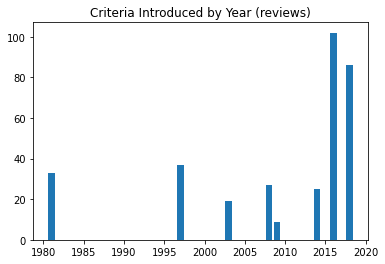

Text(0.5, 1.0, 'Criteria Introduced by Year (tools)')

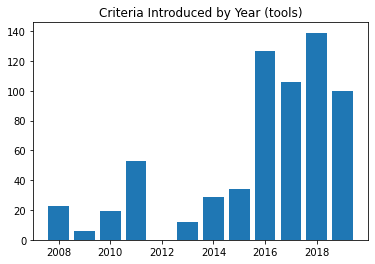

In [6]:
#years_in_dataset = raw['year'].unique()
plt.bar(raw[raw['is_review']]['year'].unique(), raw[raw['is_review']]['year'].value_counts())
plt.title("Criteria Introduced by Year (reviews)")
plt.show()
plt.bar(raw[raw['is_review'] == False]['year'].unique(), raw[raw['is_review'] == False]['year'].value_counts())
plt.title("Criteria Introduced by Year (tools)")

This isn't the most informative plot ever, but it shows the number of criteria added in each year.  One imagines this charts interest in the field, more than anything else.

## Tool-wise
Here we refactor the data to talk about each _tool_, and the features within.  Since criteria are not independent, this is the level we should do most associations.

In [7]:
def append_colwise(columnwise, rowwise_dict):
    for k, v in rowwise_dict.items():
        if k not in columnwise:
            columnwise[k] = []
        columnwise[k].append(v)

columnwise_data = {'Tool ID': raw['Tool ID'].unique()}
for tool_id in columnwise_data['Tool ID']:
    #print(tool_id)
    
    heading_counts = {f"heading_{x}": 0 for x in raw['Heading'].unique()}
    topic_counts = {f"topic_{x}": 0 for x in raw['Topic Label'].unique()}
    criterion_counts = {f"criterion_{x}": 0 for x in raw['Normalised Criterion'].unique()}
    eligibility_counts = {f"eligibility_{x}": 0 for x in raw['Eligibility of Parent Tool?'].unique()}
    ar_count = {'A': 0, 'R': 0}
    unique_counts = {'count_unique_headings': 0,
                     'count_unique_headings_12': 0,
                     'count_unique_topics': 0,
                     'count_unique_criteria': 0,
                     'count_unique_eligibility': 0
                    }
    year = None
    num_criteria = 0
    
    # Read data from the per-criterion data
    # sd == 'study data', but shorter for typing laziness.
    sd = raw[raw['Tool ID'] == tool_id]
    
    # Count up instances of each thing for this tool
    for _, sdr in sd.iterrows():
        #print(f" -> {sdr['year']}")
        heading_counts[f"heading_{sdr['Heading']}"] += 1
        topic_counts[f"topic_{sdr['Topic Label']}"] += 1
        criterion_counts[f"criterion_{sdr['Normalised Criterion']}"] += 1
        eligibility_counts[f"eligibility_{sdr['Eligibility of Parent Tool?']}"] += 1
        year = sdr['year']
    unique_counts['count_unique_headings'] = len(sd['Heading'].unique())
    unique_counts['count_unique_headings_12'] = len(sd['Heading_12'].unique())
    unique_counts['count_unique_topics'] = len(sd['Topic Label'].unique())
    unique_counts['count_unique_criteria'] = len(sd['Normalised Criterion'].unique())
    unique_counts['count_unique_eligibility'] = len(sd['Eligibility of Parent Tool?'].unique())
    ar_count = {'A': sum(sd['A']), 'R': sum(sd['R'])}
    num_criteria = sd.shape[0]
    
    append_colwise(columnwise_data, heading_counts)
    append_colwise(columnwise_data, topic_counts)
    append_colwise(columnwise_data, criterion_counts)
    append_colwise(columnwise_data, eligibility_counts)
    append_colwise(columnwise_data, ar_count)
    append_colwise(columnwise_data, unique_counts)
    append_colwise(columnwise_data, {'year': year})
    append_colwise(columnwise_data, {'num_criteria': num_criteria})

tools = pd.DataFrame(columnwise_data, index=columnwise_data['Tool ID'])    
tools['is_review'] = tools['Tool ID'].apply(is_review)
tools['is_review_numeric'] = tools['is_review'].astype('int')
tools.to_csv("output/by_tool.csv")

# Subset data for comparisons
review_tools = tools[tools['is_review']]
non_review_tools = tools[tools['is_review'] == False]

tools

,Tool ID,heading_AnalysisResultsComplete reporting?,heading_Test SystemExperimental PracticeControlling for systematic errorAllocation concealment,heading_Test SystemExperimental PracticeControlling for systematic errorBlinding,heading_Test SystemExperimental PracticeControlling for systematic errorRandomisation,heading_Test SystemExperimental Practice??,heading_Test SystemTheoryMethodological Information?,heading_AnalysisInterpretation??,heading_AnalysisResults??,heading_AnalysisResultsStatistical methods?,...,R,count_unique_headings,count_unique_headings_12,count_unique_topics,count_unique_criteria,count_unique_eligibility,year,num_criteria,is_review,is_review_numeric
Adnan 2018,Adnan 2018,1,1,1,1,0,0,0,0,0,...,0,4,2,1,4,1,2018,4,False,0
Altmann 2016,Altmann 2016,0,0,0,1,3,6,0,0,0,...,10,3,2,1,10,1,2016,10,False,0
Asweto 2017,Asweto 2017,0,0,0,0,0,1,1,1,3,...,10,10,7,1,12,1,2017,12,False,0
Aurelio 2016,Aurelio 2016,0,0,1,1,0,0,0,0,0,...,9,6,1,1,9,1,2016,9,False,0
Benetti 2018,Benetti 2018,0,0,1,0,0,2,0,0,1,...,8,7,4,1,8,1,2018,8,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Verhagen 2003,Verhagen 2003,0,0,0,0,1,0,0,0,1,...,0,12,5,1,15,1,2003,15,True,1
Vesterinen 2011,Vesterinen 2011,0,1,1,1,0,1,0,1,6,...,22,17,7,1,26,1,2011,26,False,0
Xu 2017,Xu 2017,0,0,0,0,0,0,0,1,1,...,0,10,7,1,15,1,2017,15,False,0
Yaylali 2013,Yaylali 2013,1,1,2,1,0,0,0,0,0,...,0,9,3,1,11,1,2013,11,False,0


## Toolwise Univariate

Median: 12.0


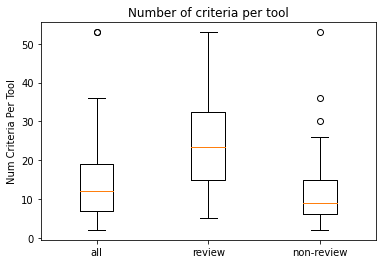

In [8]:
plt.boxplot([tools['num_criteria'], review_tools['num_criteria'], non_review_tools['num_criteria']])
plt.title("Number of criteria per tool")
plt.xticks([1,2,3], ['all', 'review', 'non-review'])
plt.ylabel("Num Criteria Per Tool")
print(f"Median: {tools['num_criteria'].median()}")

Median number of criteria is 12, but some criteria have many more. 

Text(0, 0.5, 'Frequency per tool')

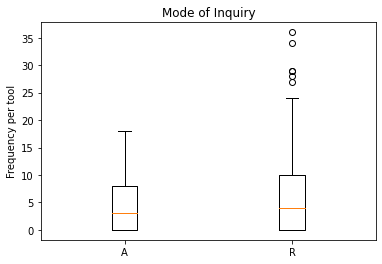

In [9]:
plt.boxplot([tools['A'], tools['R']])
plt.title("Mode of Inquiry")
plt.xticks([1,2], ['A', 'R'])
plt.ylabel("Frequency per tool")

This shows that tools sometimes have many more reporting criteria, but generally there isn't a large difference between the two.

## Toolwise Multivariate
Let's start doing some associations between the different properties of tools.

### Number of Crtieria, and Mode of Instruments

Text(0, 0.5, 'Number of criteria')

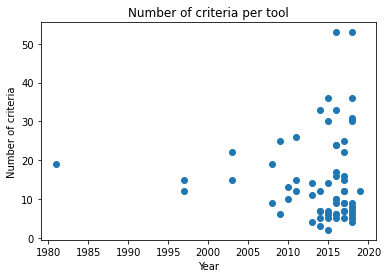

In [10]:
plt.scatter(tools['year'], tools['num_criteria'])
plt.title("Number of criteria per tool")
plt.xlabel("Year")
plt.ylabel("Number of criteria")

This shows very little of any note, but it does show that nothing's worthy of note.

Now let's take a look at A/R mix.

Text(0, 0.5, 'Number of criteria')

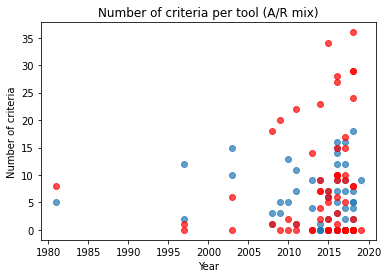

In [11]:
plt.scatter(tools['year'], tools['A'], alpha=0.7)
plt.scatter(tools['year'], tools['R'], color='red', alpha=0.7)
plt.title("Number of criteria per tool (A/R mix)")
plt.xlabel("Year")
plt.ylabel("Number of criteria")

Again, not much to go on here, but it seems tools with many criteria have a large number of reporting requirements, and no tools have a particularly large number of appraisal criteria.

We can verify this by plotting the A/R mix by study size:

Text(0, 0.5, 'Number of criteria')

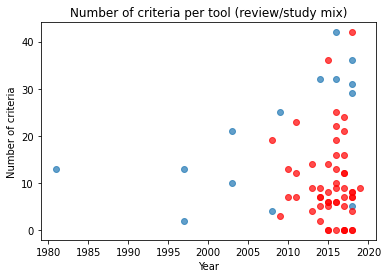

In [12]:


plt.scatter(review_tools['year'], review_tools['A'] + review_tools['R'], alpha=0.7)
plt.scatter(non_review_tools['year'], non_review_tools['R'] + non_review_tools['A'], color='red', alpha=0.7)
plt.title("Number of criteria per tool (review/study mix)")
plt.xlabel("Year")
plt.ylabel("Number of criteria")

Here, blue points are tools used for a review, rather than being a separate tool.

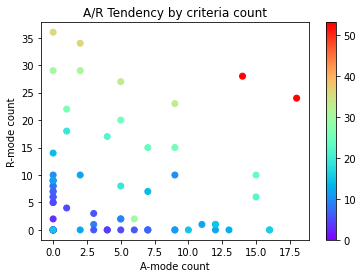

In [13]:
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=0, vmax=tools['num_criteria'].max())

fig, ax = plt.subplots()
ax.scatter(tools['A'], tools['R'], color=cmap(norm(tools['num_criteria'])))
plt.title("A/R Tendency by criteria count")
plt.xlabel("A-mode count")
plt.ylabel("R-mode count")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)

This isn't hugely helpful, as it mainly shows that things with larger numbers of things have larger numbers of things.

Text(0, 0.5, 'A/R ratio')

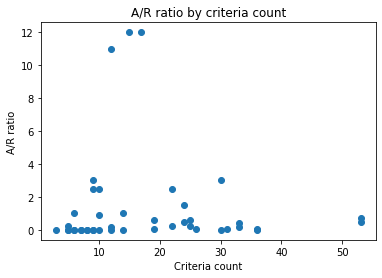

In [14]:
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=0, vmax=tools['num_criteria'].max())

plt.scatter(tools['num_criteria'], tools['A'] / tools['R'])
plt.title("A/R ratio by criteria count")
plt.xlabel("Criteria count")
plt.ylabel("A/R ratio")

This shows that, a few outliers notwithstanding, there isn't much evidence that studies with larger or smaller numbers of criteria have a bias towards Appraisal (A) or Reporting (R) Mode modes.  Ah well.

### Diversity of Criteria ('coverage')
We're interested in how much 'topic space' each tool covers.  There are a number of ways we could do this:

 1. Examine heading variability (all levels)
 2. Examine heading variability (one level, e.g. only the top level)
 3. Examine how much coverage of top-level headings is given by second-level headings (if we feature heading X, we should feature it comprehensively)

This could be done on headings, or on topics.  But as topics are of dubious quality, we'll stick to headings for now.

Rather than formally enumerating the space, we'll look first at how much variation there is in each tool's set.

Text(0.5, 1.0, 'Heading variability by year')

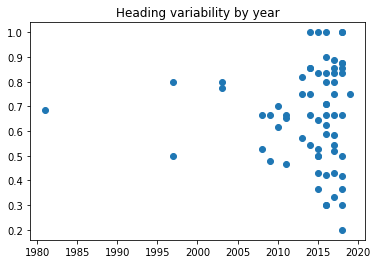

In [15]:
tools['criteria_heading_uniqueness'] = tools['count_unique_headings'] / tools['num_criteria']
plt.scatter(tools['year'], tools['criteria_heading_uniqueness'])
plt.title("Heading variability by year")

Note that the uniqueness of headings includes all heading levels here.  A high score indicates that each criterion is unique within an instrument --- a low score indicates that most criteria fall under the same headings.

Text(0.5, 1.0, 'Topic variability by year')

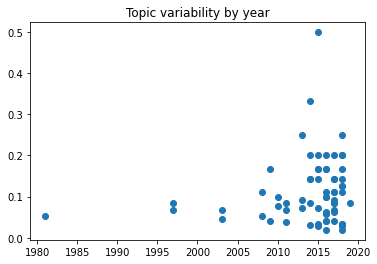

In [16]:
plt.scatter(tools['year'], tools['count_unique_topics'] / tools['num_criteria'])
plt.title("Topic variability by year")

**TODO** This section can be expanded if any of the items 1-3 above would be particularly useful

## Clustering
Let's take a subset of the features of each tool and see if there are commonalities in the way they co-occur.

There are three 'main' groups of features:

    1. Non-heading or topic fields (A/R, Derived, Eligibility, counts)
    2. Headings
    3. Topics
    
We'll do each in turn, as including all features is likely to be led by the coding method rather than discovering true groups in the data.

Text(0.5, 1.0, 'Misc Counts')

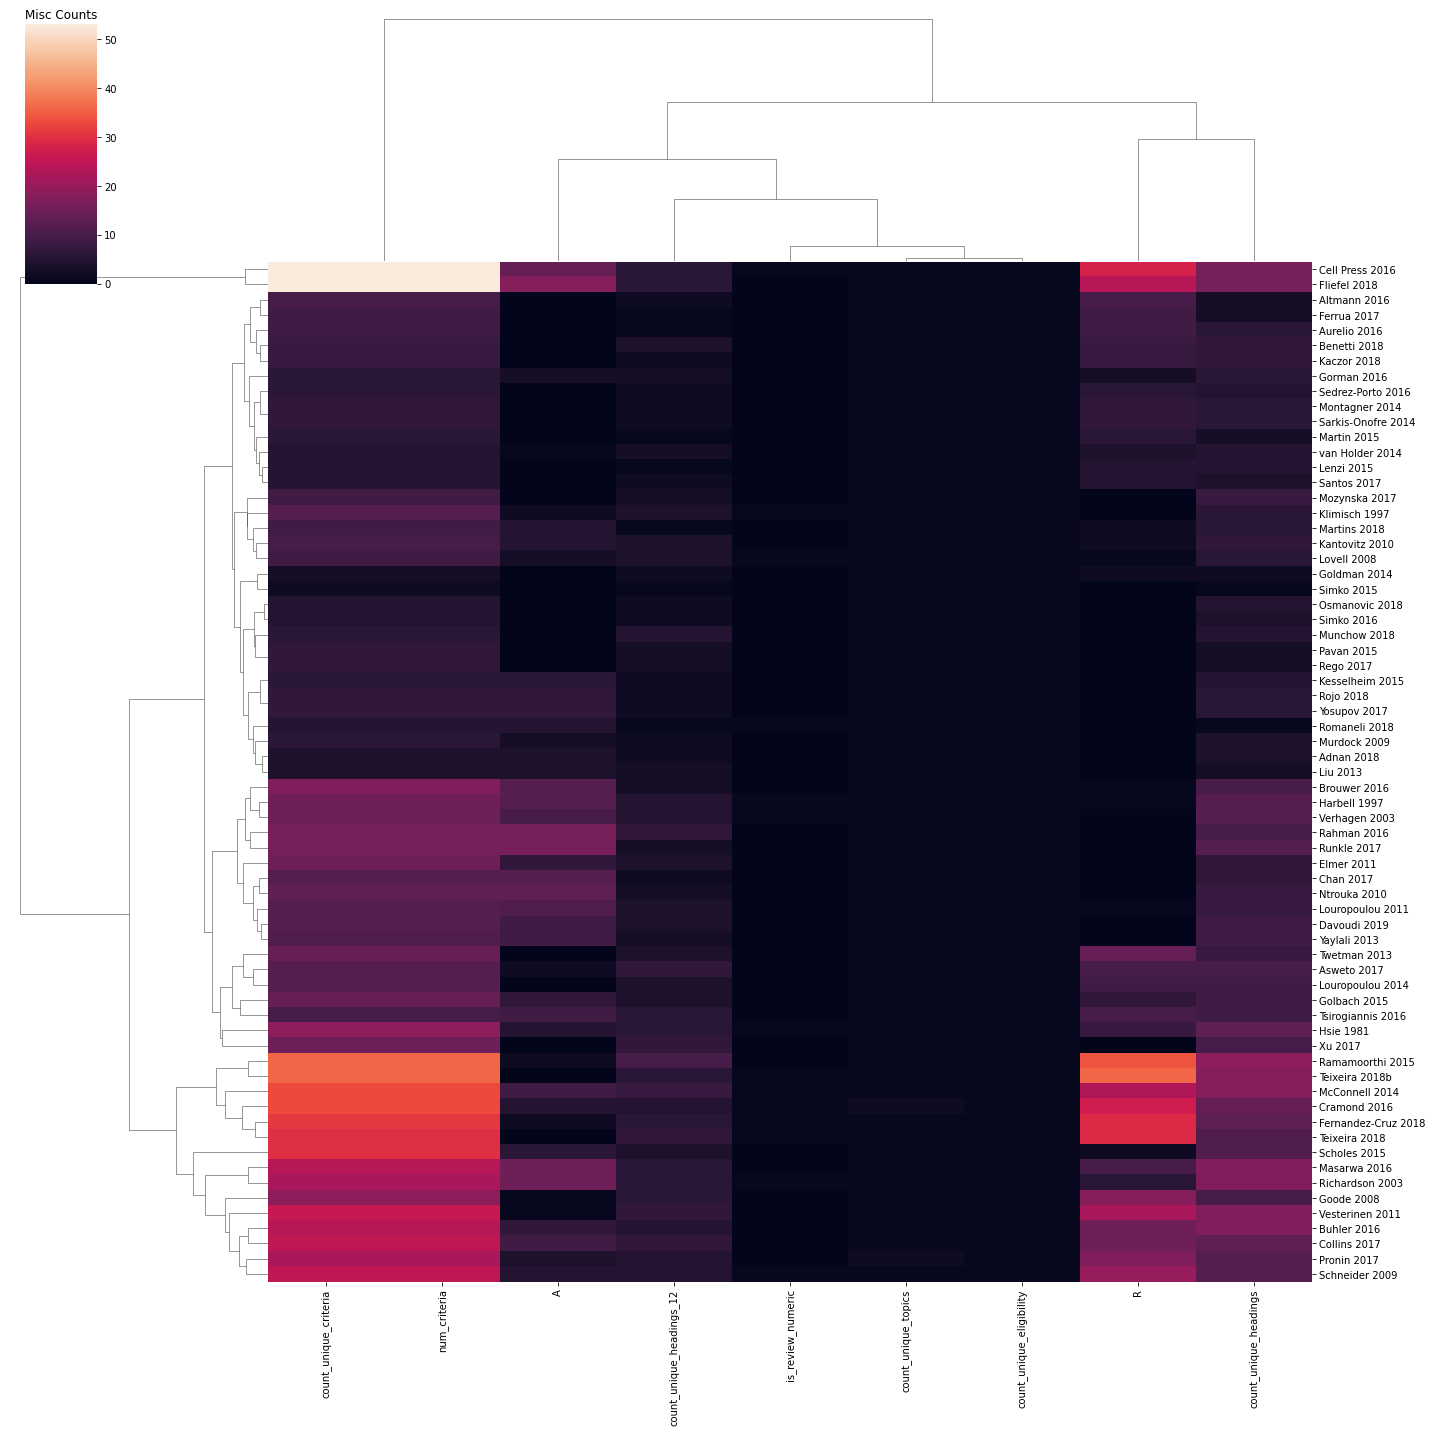

In [17]:
def filter_misc_cols(string):
    return string == 'A' or string == 'R' or string.startswith('count_') or string.startswith('num_') or string == 'is_review_numeric'

g = sns.clustermap(tools[[t for t in tools.columns if filter_misc_cols(t)]], figsize=(20, 20))
plt.title("Misc Counts")

The above dendrogram shows us groupings by counts of things.  The top dendrogram shows column linkage, and the left-hand one shows tool-to-tool similarity.

We can see that `Cell Press 2016` sets itself aside by sheer number of criteria.  A strong group at the bottom (`Ramamoorthi 2015` down) shows high counts for R, unique criteria, and criterion count.  It's worth noting that the counts aren't normalised here, so they are measures of absolute coverage rather than relative complexity of tool.

Interestingly, the most useful feature is the count of unique headings.  This may be because it overlaps so strongly with other counts (after all, one must have many features for them to be unique).

The feature indicating if a study is a review itself or a novel tool does not seem to be an important factor in grouping studies.

Text(0.5, 1.0, 'Headings')

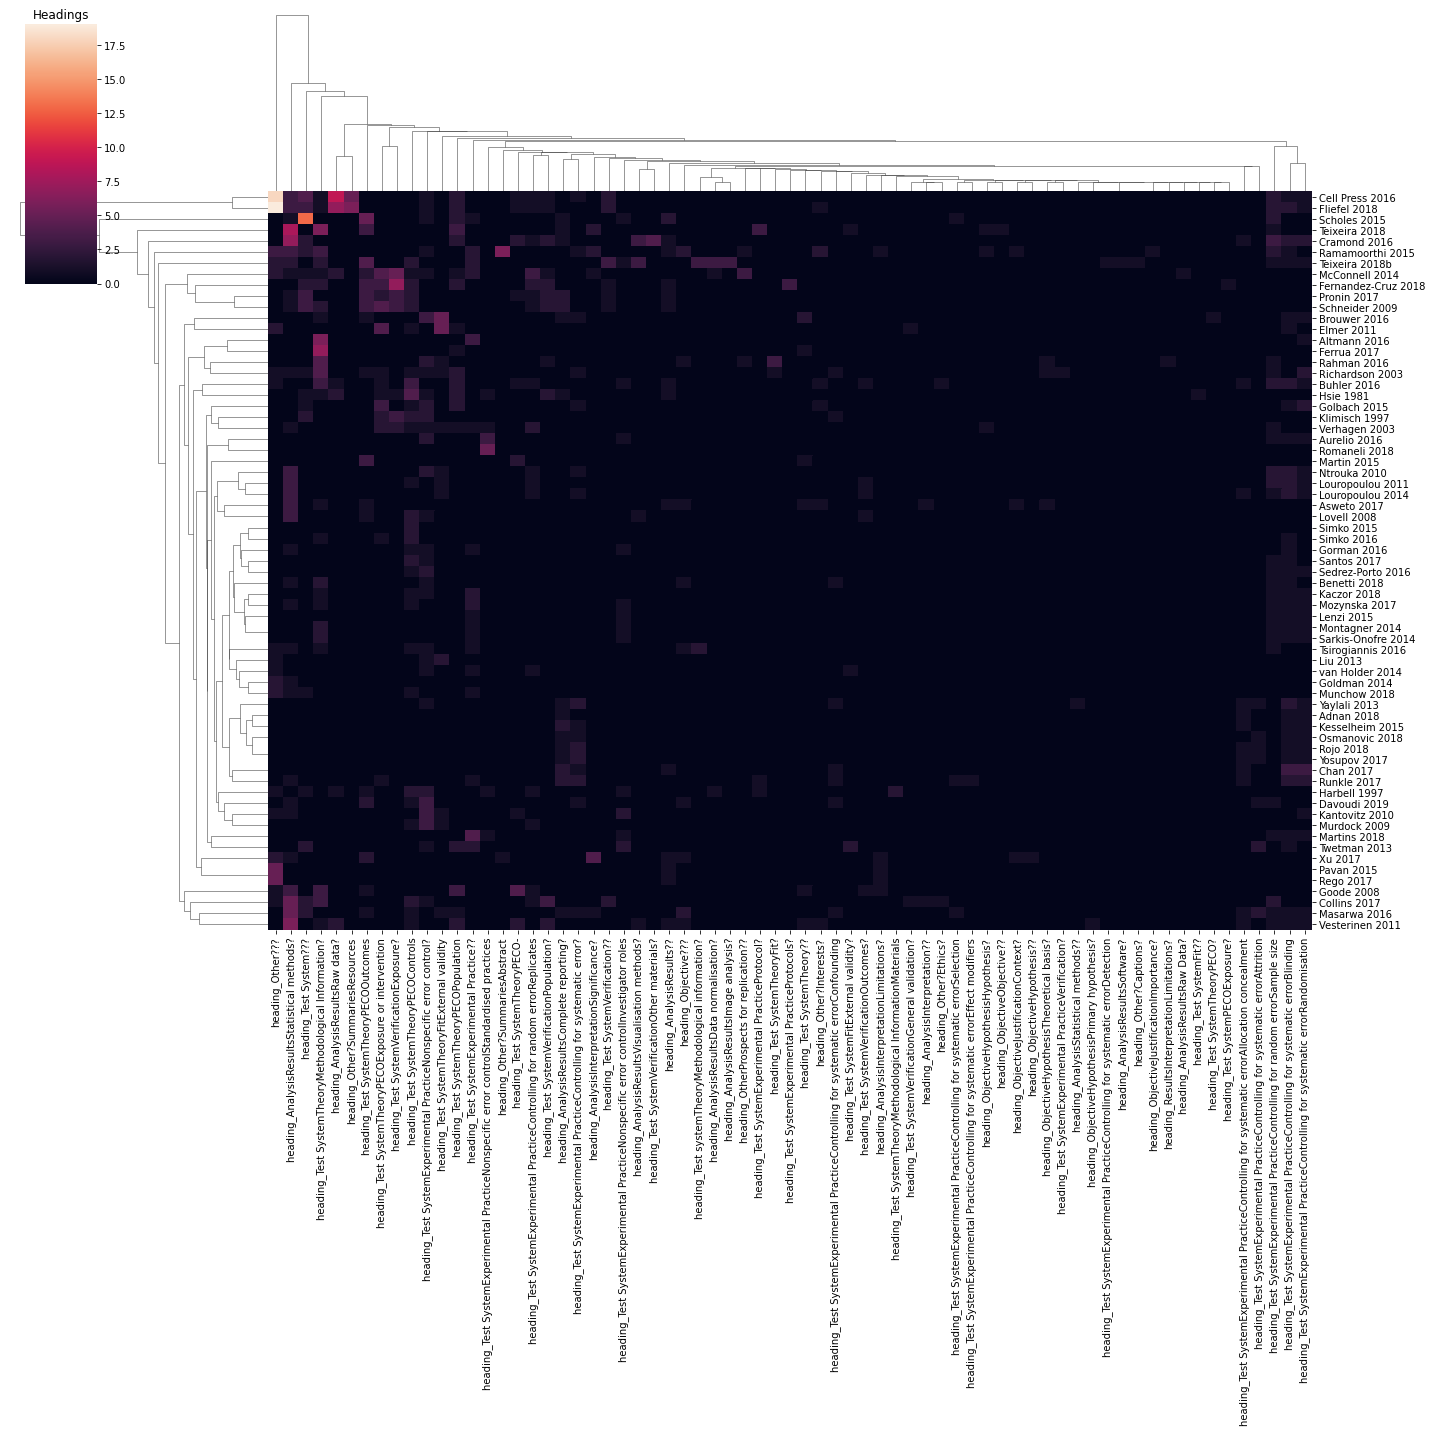

In [18]:
def filter_heading_cols(string):
    return string.startswith('heading_')

g = sns.clustermap(tools[[t for t in tools.columns if filter_heading_cols(t)]], figsize=(20, 20))
plt.title("Headings")

This points at there being few patterns of co-occurrence between headings, but remember that this is _all_ heading depths.  We may find more information generalising some headings by taking level 1 or 2.

Once again, `Cell Press 2016` sets itself aside early.

On to the topic columns...

Text(0.5, 1.0, 'Topics')

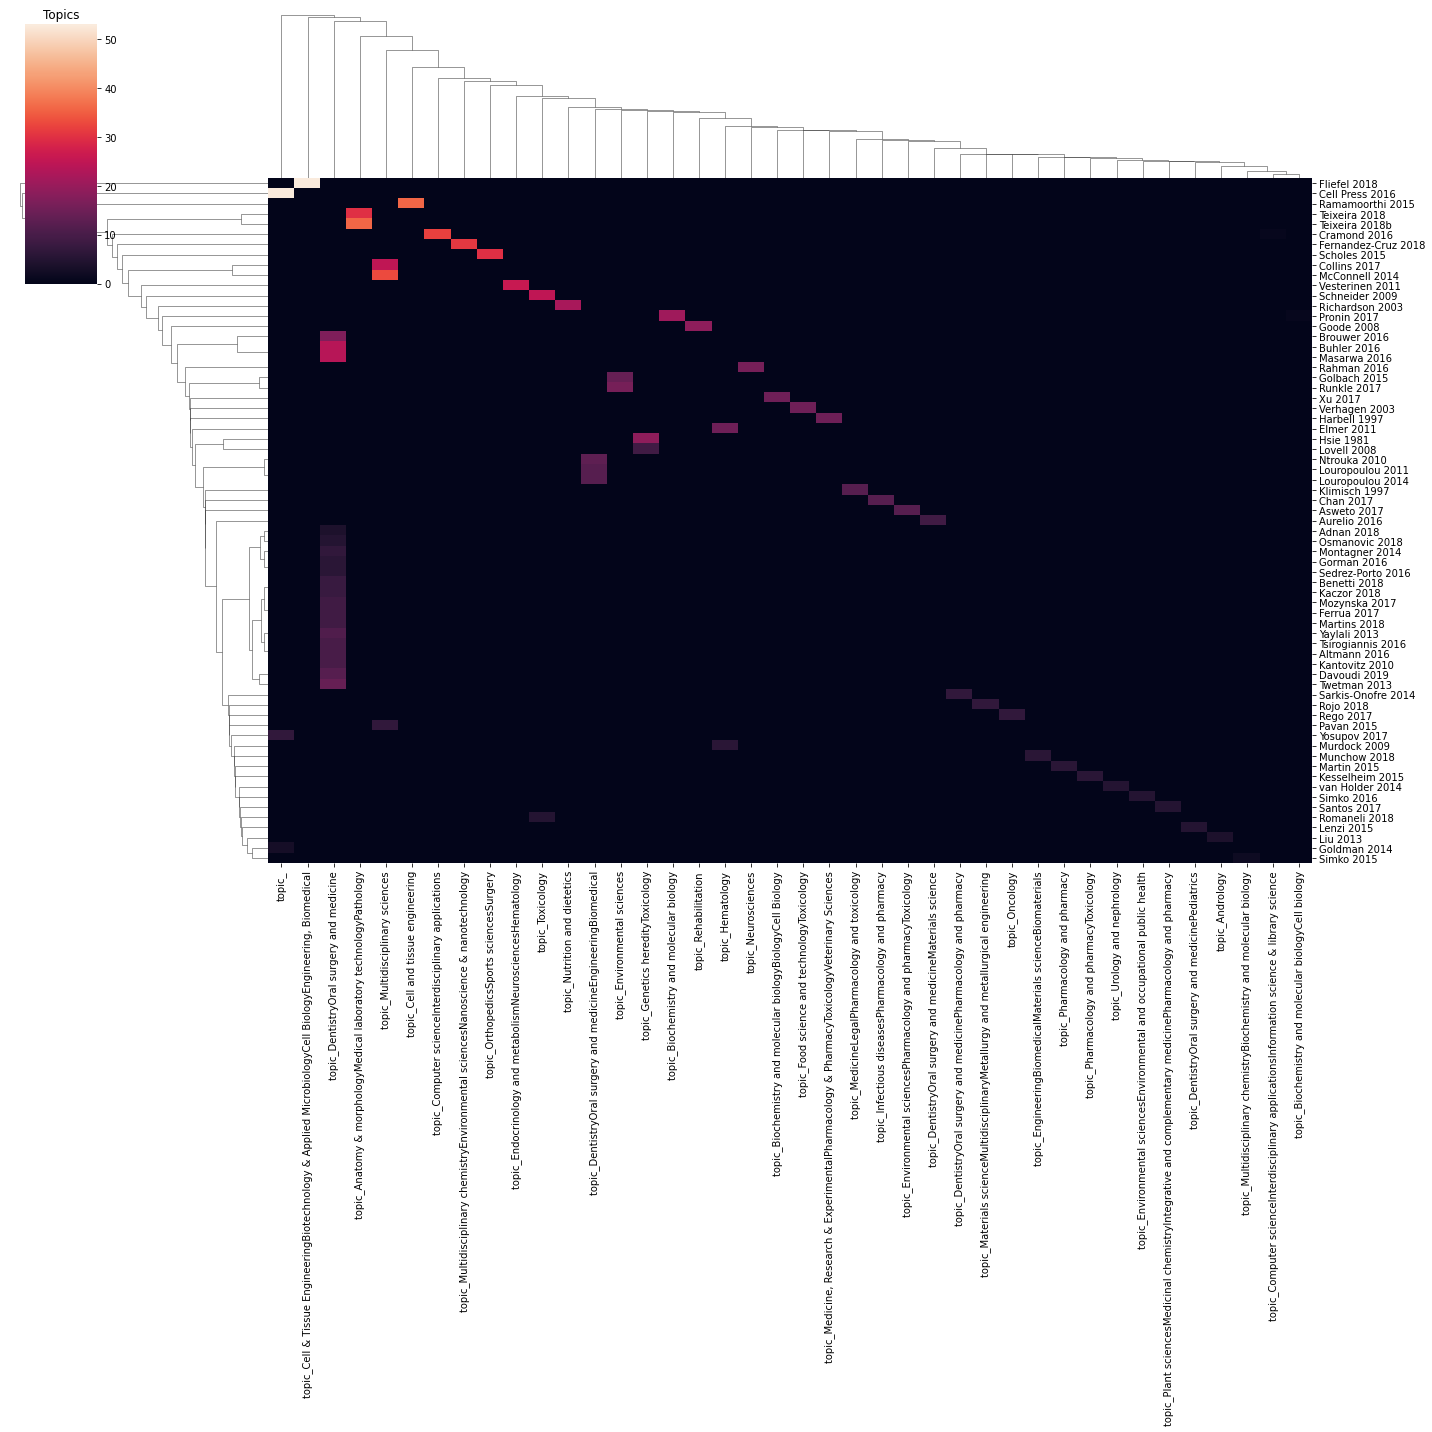

In [19]:
def filter_topic_cols(string):
    return string.startswith('topic_')

g = sns.clustermap(tools[[t for t in tools.columns if filter_topic_cols(t)]], figsize=(20, 20))
plt.title("Topics")

This dendrogram indicates even less convincing clusters than the previous one.

### Normalised Criteria Counts
Here we will normalise some of the counts within instruments, so that the absolute count of criteria is less important to the instrument grouping.

<BarContainer object of 67 artists>

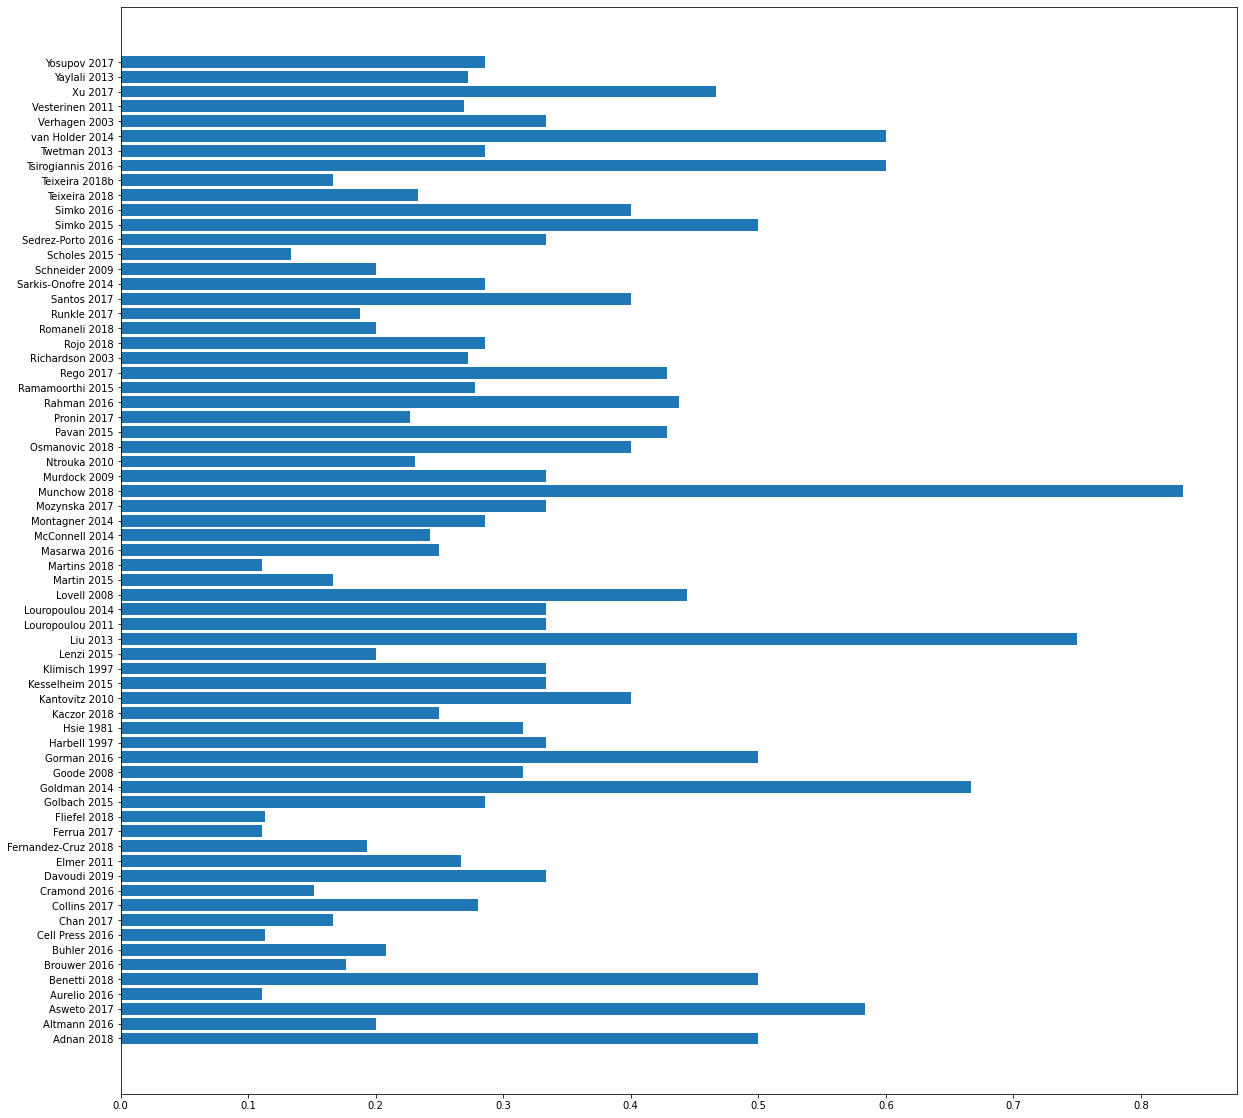

In [20]:
tools['criteria_heading_uniqueness_12'] = tools['count_unique_headings_12'] / tools['num_criteria']
plt.figure(figsize=(20,20))
plt.barh(tools['Tool ID'], tools['criteria_heading_uniqueness_12'])

This is using *only top level headings (levels 1 and 2)*.  High numbers show that criteria are unique, low numbers that headings are reused between criteria (which may imply lower coverage of the heading-space).

Text(0.5, 1.0, 'Clustering by heading uniqueness')

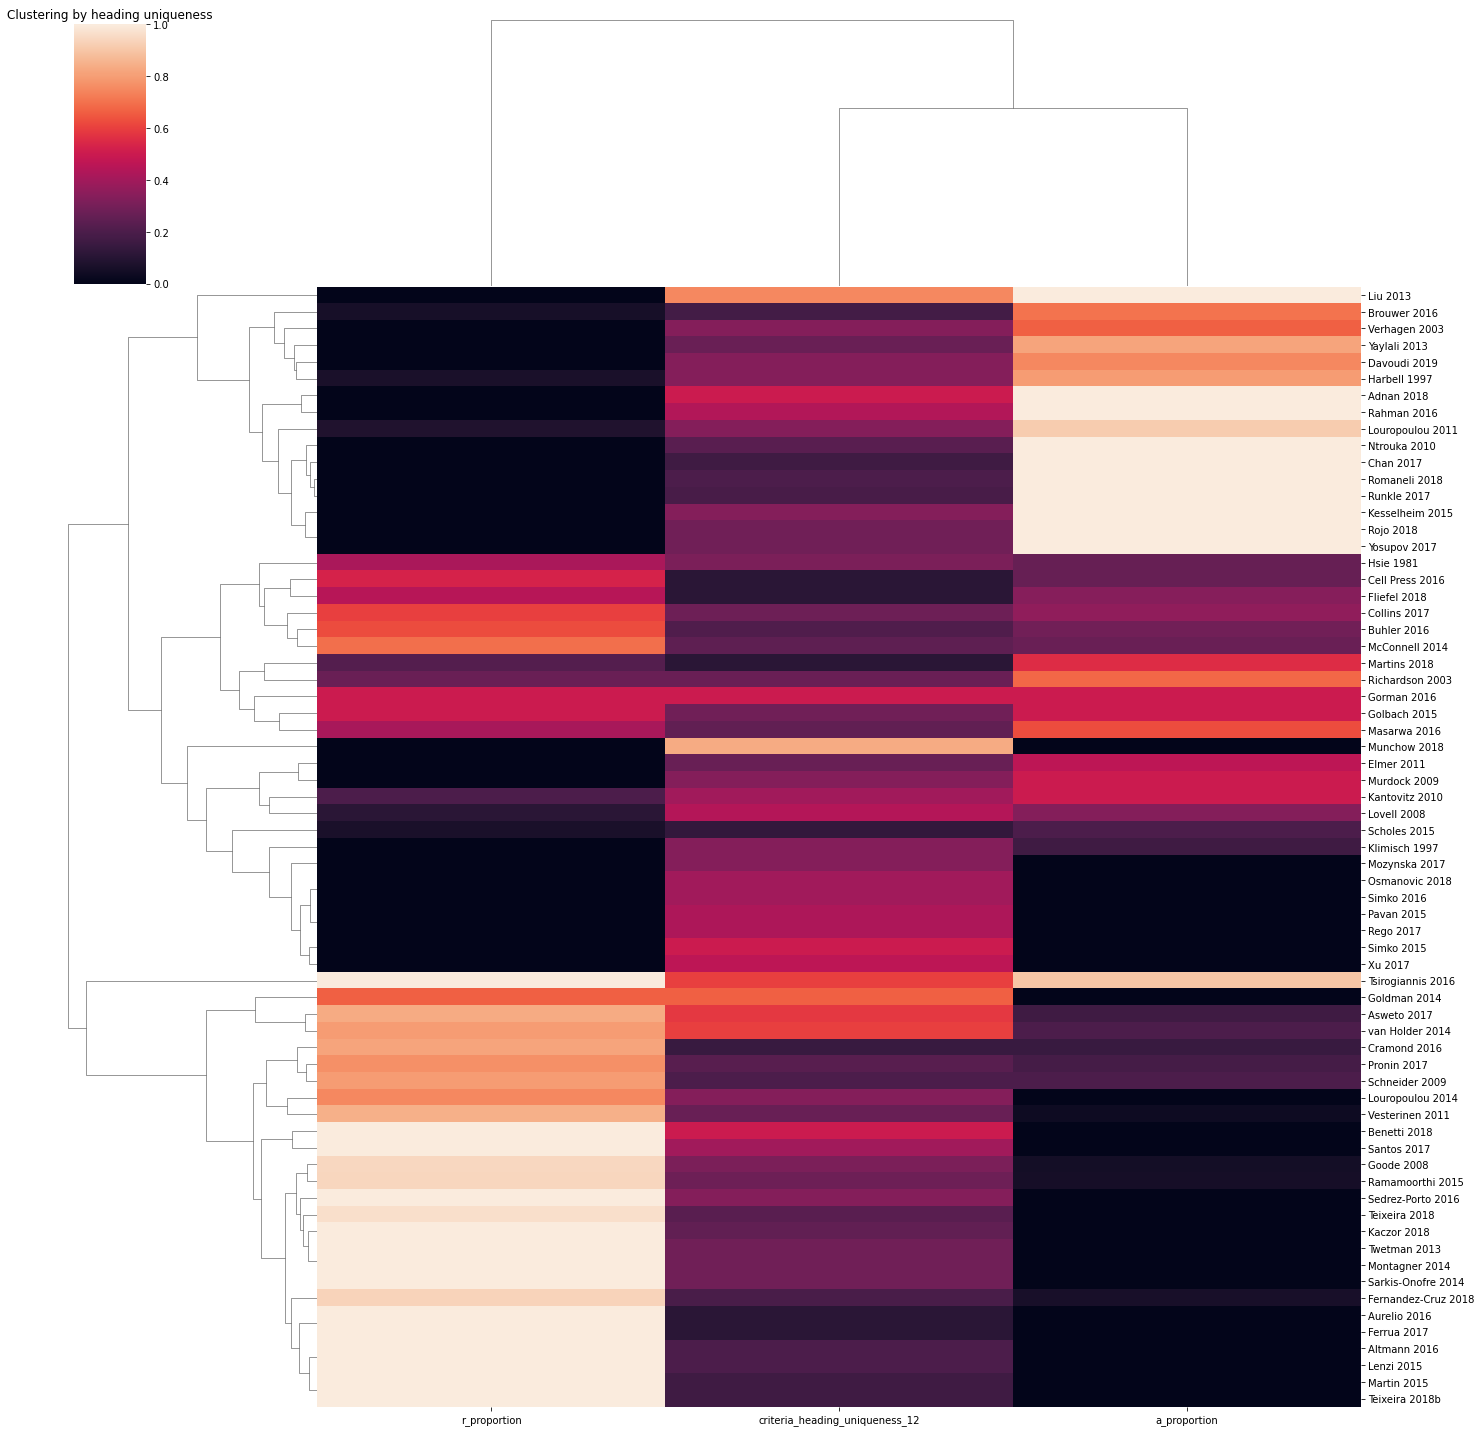

In [21]:
tools['a_proportion'] = tools['A'] / tools['num_criteria']
tools['r_proportion'] = tools['R'] / tools['num_criteria']

def filter_topic_cols(string):
    return string == 'criteria_heading_uniqueness_12' or string.endswith('_proportion')

g = sns.clustermap(tools[[t for t in tools.columns if filter_topic_cols(t)]], figsize=(20, 20))
plt.title("Clustering by heading uniqueness")

This shows groupings by how A-biased, R-biased, and unique-heading-biased the instruments are.

It shows greater correlation between A-focused instruments and those with criteria coverage, though not by a _huge_ amount.  There is a clear group of studies that are very R-biased, and a clear group thar is very A-biased, and a group that lies somewhere in the middle.  The 'somewhere in the middle' group can be distinguished between those that are somewhat R-biased and those that are not.

Let's add the type of study into this plot, so we can see if it changes anything.

Text(0.5, 1.0, 'Clustering by heading uniqueness and review status')

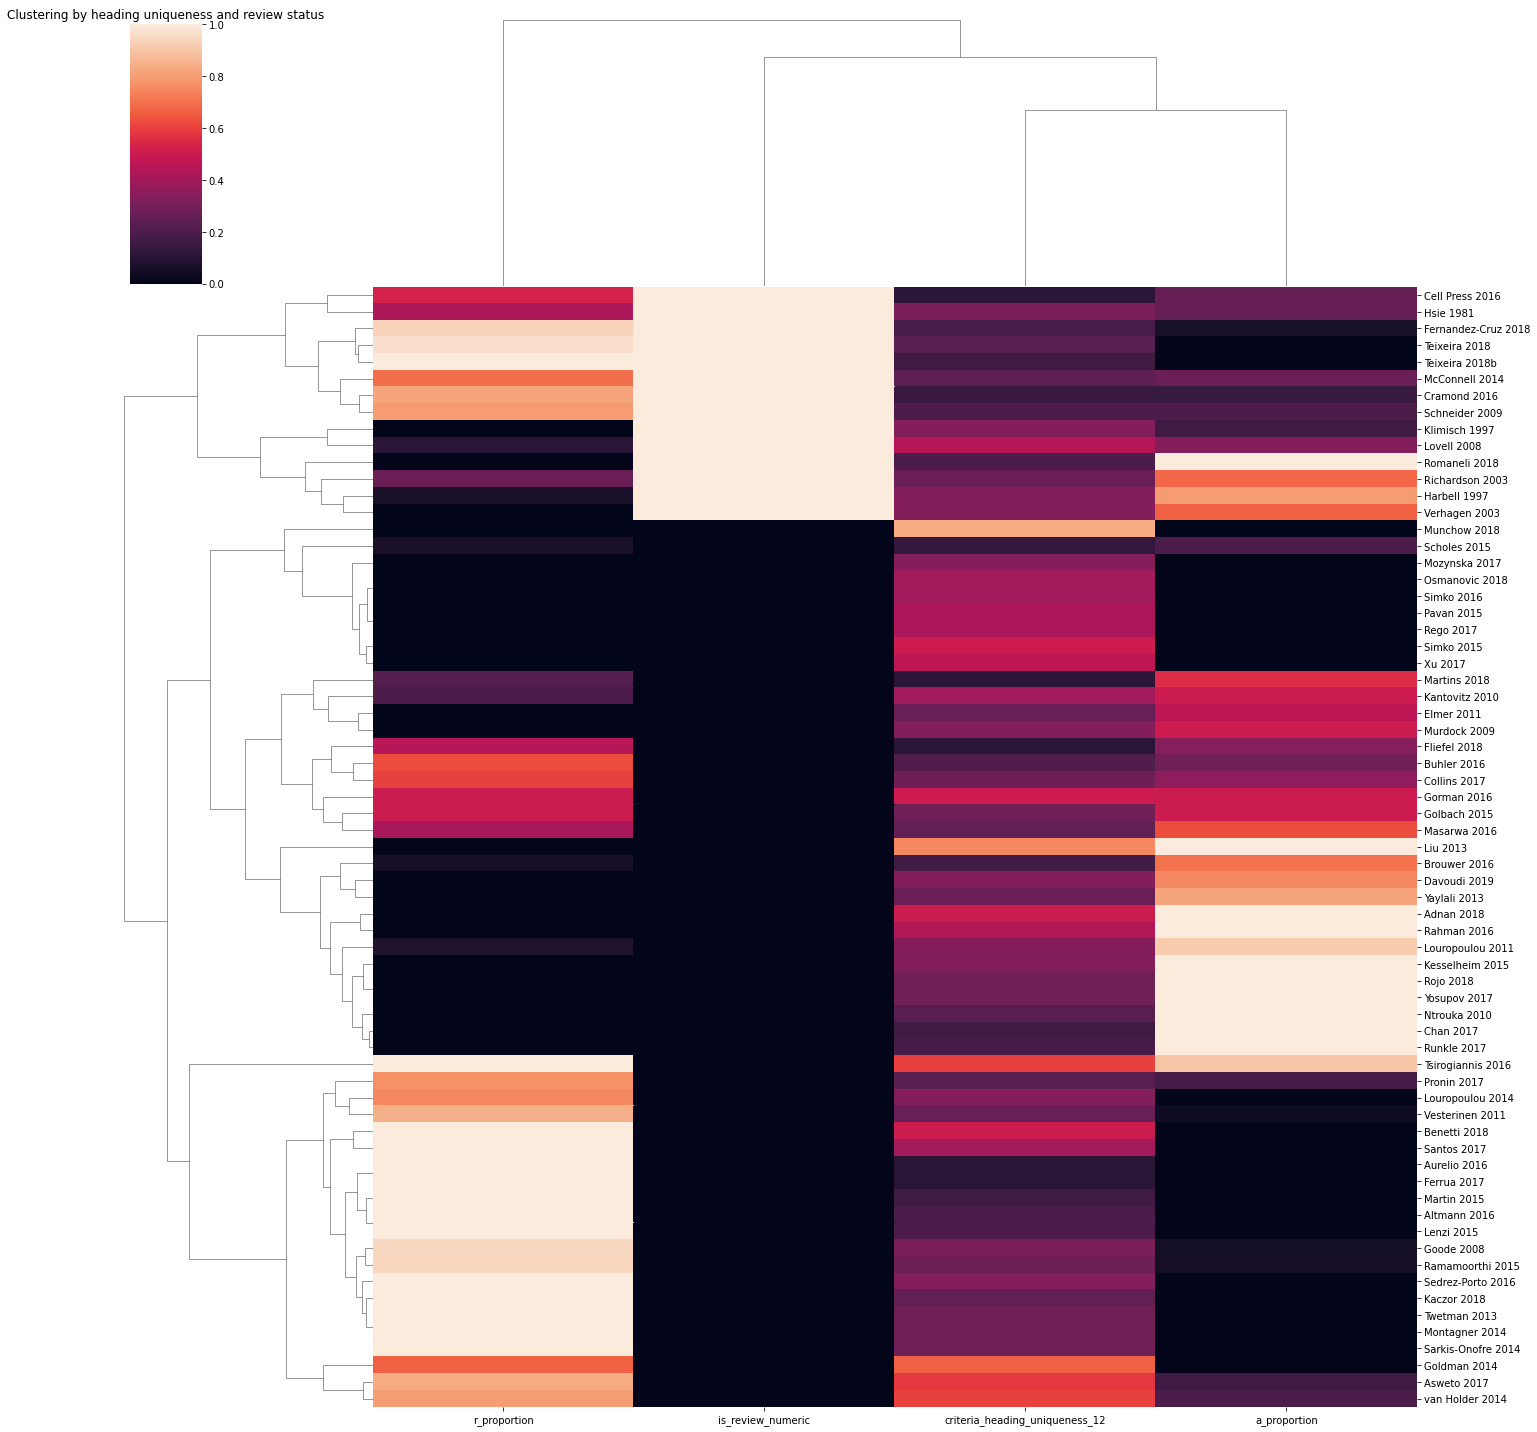

In [22]:
def filter_topic_cols(string):
    return string == 'criteria_heading_uniqueness_12' or string.endswith('_proportion') or string == 'is_review_numeric'

g = sns.clustermap(tools[[t for t in tools.columns if filter_topic_cols(t)]], figsize=(20, 20))
plt.title("Clustering by heading uniqueness and review status")

This is pretty clear cut --- those instruments with a `review` status are tightly grouped.  More tightly than the A/R groupings mentioned before.  Heading uniqueness falls down the dendrogram and is split out quite evenly across the clusters.